In [28]:
import pandas_datareader as pdr
dataset = pdr.get_data_tiingo('GOOG', api_key='16f81265f26de1c59c164946e68d68f8b728fd10')

In [29]:
dataset.tail()

close       high       low      open  \
symbol date                                                                
GOOG   2021-05-21 00:00:00+00:00  2345.10  2368.9999  2342.370  2365.990   
       2021-05-24 00:00:00+00:00  2406.67  2418.4800  2360.110  2367.000   
       2021-05-25 00:00:00+00:00  2409.07  2432.8900  2402.990  2420.000   
       2021-05-26 00:00:00+00:00  2433.53  2442.9440  2412.515  2412.835   
       2021-05-27 00:00:00+00:00  2402.51  2440.0000  2402.000  2436.940   

                                   volume  adjClose    adjHigh    adjLow  \
symbol date                                                                
GOOG   2021-05-21 00:00:00+00:00  1141632   2345.10  2368.9999  2342.370   
       2021-05-24 00:00:00+00:00  1062189   2406.67  2418.4800  2360.110   
       2021-05-25 00:00:00+00:00   941928   2409.07  2432.8900  2402.990   
       2021-05-26 00:00:00+00:00  1092819   2433.53  2442.9440  2412.515   
       2021-05-27 00:00:00+00:00  1948113   2402.51  2440.0000  2402.000   

                                   adjOpen  adjVolume  divCash  splitFactor  
symbol date                                                                  
GOOG   2021-05-21 00:00:00+00:00  2365.990    1141632      0.0          1.0  
       2021-05-24 00:00:00+00:00  2367.000    1062189      0.0          1.0  
       2021-05-25 00:00:00+00:00  2420.000     941928      0.0          1.0  
       2021-05-26 00:00:00+00:00  2412.835    1092819      0.0          1.0  
       2021-05-27 00:00:00+00:00  2436.940    1948113      0.0          1.0

In [30]:
dataset.to_csv('GOOG.csv')

In [31]:
import pandas as pd

In [32]:
df = pd.read_csv('GOOG.csv')

In [49]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,GOOG,2021-05-21 00:00:00+00:00,2345.10,2368.9999,2342.370,2365.990,1141632,2345.10,2368.9999,2342.370,2365.990,1141632,0.0,1.0
1254,GOOG,2021-05-24 00:00:00+00:00,2406.67,2418.4800,2360.110,2367.000,1062189,2406.67,2418.4800,2360.110,2367.000,1062189,0.0,1.0
1255,GOOG,2021-05-25 00:00:00+00:00,2409.07,2432.8900,2402.990,2420.000,941928,2409.07,2432.8900,2402.990,2420.000,941928,0.0,1.0
1256,GOOG,2021-05-26 00:00:00+00:00,2433.53,2442.9440,2412.515,2412.835,1092819,2433.53,2442.9440,2412.515,2412.835,1092819,0.0,1.0
1257,GOOG,2021-05-27 00:00:00+00:00,2402.51,2440.0000,2402.000,2436.940,1948113,2402.51,2440.0000,2402.000,2436.940,1948113,0.0,1.0


In [34]:
df1 = df['close']
df1.shape

(1258,)

In [35]:
import matplotlib.pyplot as plt

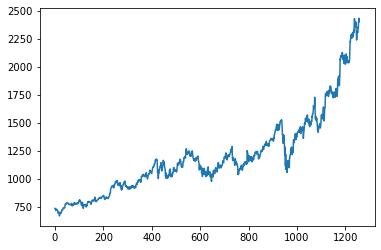

In [36]:
plt.plot(df1)

In [37]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [38]:
scalar = MinMaxScaler()
df1 = np.array(df1).reshape(-1,1)

In [39]:
df1 = scalar.fit_transform(df1)
df1.shape

(1258, 1)

In [40]:
from sklearn.model_selection import train_test_split
train_data , test_data = train_test_split(df1, random_state = 0 , train_size = 0.8)


In [41]:
def create_dataset(dataset , time_step=1):
    data_X = []
    data_y = []
    for i in range (len(dataset)-time_step-1):
        data_X.append(dataset[i:(time_step+i) , 0])
        data_y.append(dataset[i+time_step , 0])
    return np.array(data_X , dtype="object") , np.array(data_y , dtype="object")    

In [42]:
X_train , y_train = create_dataset(train_data , 100)
X_test , y_test = create_dataset(test_data , 100)
X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
y_test = np.asarray(y_test).astype('float32')

In [43]:
X_train.shape , y_train.shape

((905, 100), (905,))

In [44]:
X_train = X_train.reshape(X_train.shape[0] , X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0] , X_test.shape[1] , 1)

In [45]:
####Creating Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [46]:
model = Sequential()
model.add(LSTM(50,input_shape = (100 ,1)))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error' , optimizer = 'adam')

In [47]:
model.fit(X_train , y_train , validation_data = (X_test , y_test) , epochs = 100 , batch_size = 64 , verbose = 1)      

Epoch 1/100
15/15 [==============================] - 2s 52ms/step - loss: 0.0907 - val_loss: 0.0467
Epoch 2/100
15/15 [==============================] - 0s 26ms/step - loss: 0.0512 - val_loss: 0.0420
Epoch 3/100
15/15 [==============================] - 0s 26ms/step - loss: 0.0544 - val_loss: 0.0398
Epoch 4/100
15/15 [==============================] - 0s 26ms/step - loss: 0.0493 - val_loss: 0.0398
Epoch 5/100
15/15 [==============================] - 0s 26ms/step - loss: 0.0479 - val_loss: 0.0397
Epoch 6/100
15/15 [==============================] - 0s 25ms/step - loss: 0.0417 - val_loss: 0.0395
Epoch 7/100
15/15 [==============================] - 0s 26ms/step - loss: 0.0487 - val_loss: 0.0394
Epoch 8/100
15/15 [==============================] - 0s 26ms/step - loss: 0.0415 - val_loss: 0.0393
Epoch 9/100
15/15 [==============================] - 0s 26ms/step - loss: 0.0464 - val_loss: 0.0395
Epoch 10/100
15/15 [==============================] - 0s 25ms/step - loss: 0.0415 - val_loss: 0.0390

15/15 [==============================] - 0s 29ms/step - loss: 0.0459 - val_loss: 0.0385
Epoch 83/100
15/15 [==============================] - 0s 29ms/step - loss: 0.0461 - val_loss: 0.0383
Epoch 84/100
15/15 [==============================] - 0s 28ms/step - loss: 0.0414 - val_loss: 0.0386
Epoch 85/100
15/15 [==============================] - 0s 27ms/step - loss: 0.0431 - val_loss: 0.0386
Epoch 86/100
15/15 [==============================] - 0s 27ms/step - loss: 0.0438 - val_loss: 0.0383
Epoch 87/100
15/15 [==============================] - 0s 27ms/step - loss: 0.0431 - val_loss: 0.0399
Epoch 88/100
15/15 [==============================] - 0s 34ms/step - loss: 0.0479 - val_loss: 0.0381
Epoch 89/100
15/15 [==============================] - 1s 37ms/step - loss: 0.0445 - val_loss: 0.0391
Epoch 90/100
15/15 [==============================] - 0s 33ms/step - loss: 0.0445 - val_loss: 0.0382
Epoch 91/100
15/15 [==============================] - 1s 42ms/step - loss: 0.0444 - val_loss: 0.0385
Epo

In [91]:
###Prediction And Accuracy
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [53]:
from sklearn.metrics import mean_squared_error
import math

In [55]:
math.sqrt(mean_squared_error(train_predict , y_train))

0.2105731731828072

In [56]:
math.sqrt(mean_squared_error(test_predict , y_test))

0.19611897857204352